In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('les modalités de la variable prédictive:', np.unique(y))
print(iris.feature_names)

les modalités de la variable prédictive: [0 1 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
print('Cardinale des modalités y: ', np.bincount(y))
print('Cardinale des modalités :', np.bincount(y_train))
print('Cardinale des modalités y_test:', np.bincount(y_test))

Cardinale des modalités y:  [50 50 50]
Cardinale des modalités : [35 35 35]
Cardinale des modalités y_test: [15 15 15]


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker et color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot de la surface de decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot tout les exemples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

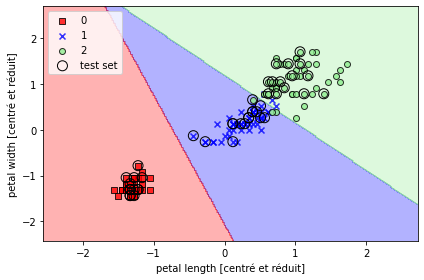

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [centré et réduit]')
plt.ylabel('petal width [centré et réduit]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
def get_column_list(df):
    column_list=[]
    for i in df.columns:
    	column_list.append(i)
    return column_list

In [11]:
import pandas as pd
df = pd.read_csv('/Users/mohamedalmahditantaoui/Documents/M2/Machine_Learning_Python/GitHub/projetPython/ProjectApp/datasets/redwine_data.csv')

y = df['quality']
X = df[['pH','fixed acidity']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
y_pred = model.predict(X_test)
    
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

matrix_conf = pd.DataFrame( np.array(confusion_matrix(y_test, y_pred)),columns=np.unique(y) )#, index=np.unique(y), columns=np.unique(y) )
matrix_conf.insert(0, "Observations\Prédictions", np.unique(y), True) 
matrix_conf

class_report=classification_report(y_test, y_pred)
text = str(class_report)+'\n Accuracy score : '+str(accuracy_score(y_test, y_pred))
get_column_list(matrix_conf)

['Observations\\Prédictions', 3, 4, 5, 6, 7, 8]

In [12]:
(y_test.dtype == 'object') 

False

In [13]:
[str(i) for i in np.unique(y)]

['3', '4', '5', '6', '7', '8']

In [14]:
# matrix_conf
{matrix_conf[column_name].name : matrix_conf[column_name] for column_name in get_column_list(matrix_conf)}

{'Observations\\Prédictions': 0    3
 1    4
 2    5
 3    6
 4    7
 5    8
 Name: Observations\Prédictions, dtype: int64,
 3: 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 Name: 3, dtype: int64,
 4: 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 Name: 4, dtype: int64,
 5: 0      2
 1     10
 2    138
 3    116
 4     29
 5      3
 Name: 5, dtype: int64,
 6: 0     1
 1     6
 2    66
 3    76
 4    31
 5     2
 Name: 6, dtype: int64,
 7: 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 Name: 7, dtype: int64,
 8: 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 Name: 8, dtype: int64}

In [15]:
{df[column_name].name : df[column_name] for column_name in get_column_list(df)}

{'fixed acidity': 0        7.4
 1        7.8
 2        7.8
 3       11.2
 4        7.4
         ... 
 1594     6.2
 1595     5.9
 1596     6.3
 1597     5.9
 1598     6.0
 Name: fixed acidity, Length: 1599, dtype: float64,
 'volatile acidity': 0       0.700
 1       0.880
 2       0.760
 3       0.280
 4       0.700
         ...  
 1594    0.600
 1595    0.550
 1596    0.510
 1597    0.645
 1598    0.310
 Name: volatile acidity, Length: 1599, dtype: float64,
 'citric acid': 0       0.00
 1       0.00
 2       0.04
 3       0.56
 4       0.00
         ... 
 1594    0.08
 1595    0.10
 1596    0.13
 1597    0.12
 1598    0.47
 Name: citric acid, Length: 1599, dtype: float64,
 'residual sugar': 0       1.9
 1       2.6
 2       2.3
 3       1.9
 4       1.9
        ... 
 1594    2.0
 1595    2.2
 1596    2.3
 1597    2.0
 1598    3.6
 Name: residual sugar, Length: 1599, dtype: float64,
 'chlorides': 0       0.076
 1       0.098
 2       0.092
 3       0.075
 4       0.076
         ...  
 

In [16]:
import numpy as np

from bokeh.io import show
from bokeh.layouts import column, row
from bokeh.models import Spinner
from bokeh.plotting import figure

x = np.random.rand(10)
y = np.random.rand(10)

p = figure(x_range=(0, 1), y_range=(0, 1))
points = p.scatter(x=x, y=y, size=4)

spinner = Spinner(title="Glyph size", low=1, step=0.5, value=4, width=80)
spinner.js_link('value', points.glyph, 'size')

show(row(column(spinner, width=100), p))

In [ ]:
from sklearn.datasets import load_breast_cancer

load_breast_cancer.